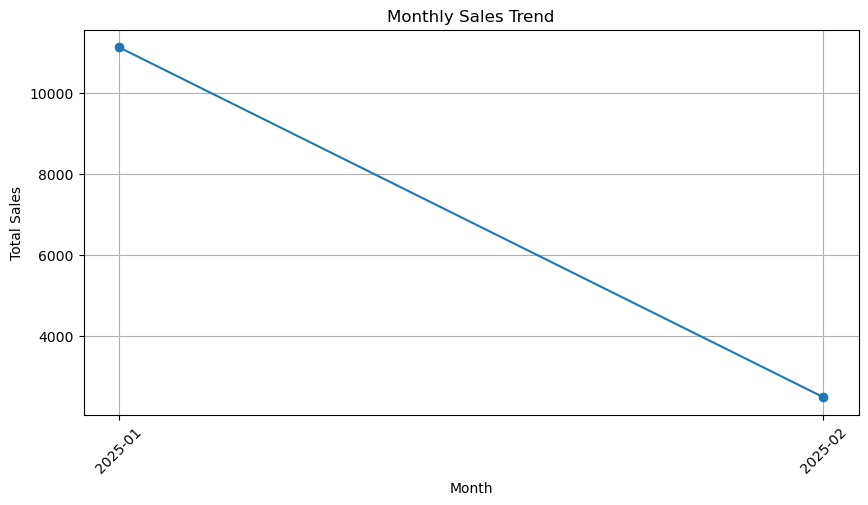

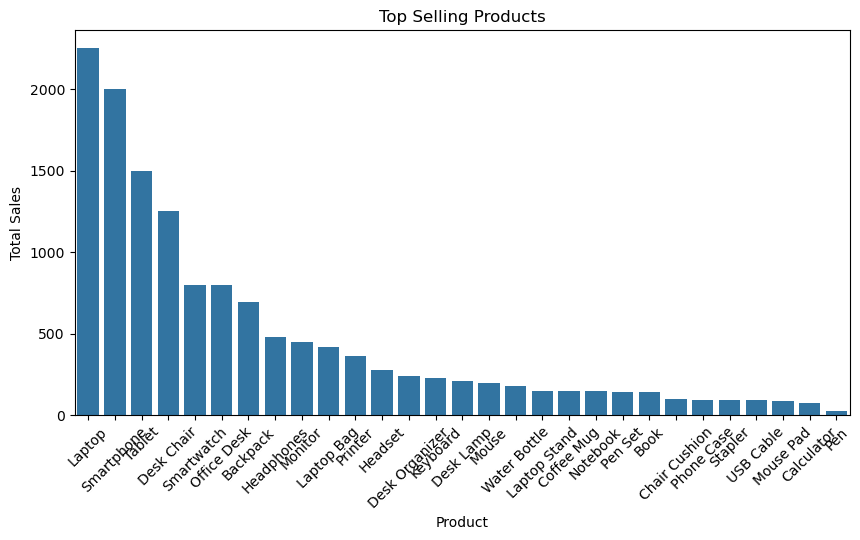

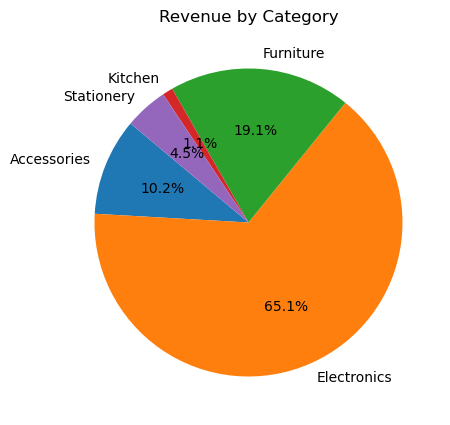

MAE: 8635.0
MSE: 74563225.0
RMSE: 8635.0
Next Month Sales Forecast: 11132.0

Top 5 Products by Sales:
Product
Laptop        2250
Smartphone    2000
Tablet        1500
Desk Chair    1250
Smartwatch     800
Name: TotalSales, dtype: int64

Revenue by Category:
Category
Accessories    1391
Electronics    8869
Furniture      2600
Kitchen         150
Stationery      619
Name: TotalSales, dtype: int64


In [2]:
# Project: Customer Sales Insights Dashboard (Profile 7)

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 2: Load Dataset (replace with your CSV file)
df = pd.read_csv('sales_dataset (1).csv')  # CSV should have columns: CustomerID, Date, Product, Category, Quantity, Price

# Step 3: Data Preprocessing
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create TotalSales column
df['TotalSales'] = df['Quantity'] * df['Price']

# Step 4: Exploratory Data Analysis
# Monthly sales trend
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['TotalSales'].sum()

plt.figure(figsize=(10,5))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Best-selling products
product_sales = df.groupby('Product')['TotalSales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=product_sales.index, y=product_sales.values)
plt.title('Top Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Category-wise revenue
category_sales = df.groupby('Category')['TotalSales'].sum()
plt.figure(figsize=(8,5))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Revenue by Category')
plt.show()

# Step 5: Simple Sales Prediction (Next Month)
# Aggregate monthly sales for modeling
monthly_sales_df = monthly_sales.reset_index()
monthly_sales_df['Month_num'] = np.arange(len(monthly_sales_df)) + 1

X = monthly_sales_df[['Month_num']]
y = monthly_sales_df['TotalSales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

# Predict next month
next_month = pd.DataFrame({'Month_num': [len(monthly_sales_df)+1]})
forecast = model.predict(next_month)
print('Next Month Sales Forecast:', forecast[0])

# Step 6: Insights
print('\nTop 5 Products by Sales:')
print(product_sales.head())
print('\nRevenue by Category:')
print(category_sales)
